Import packages and load image

In [7]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

Preprocess image

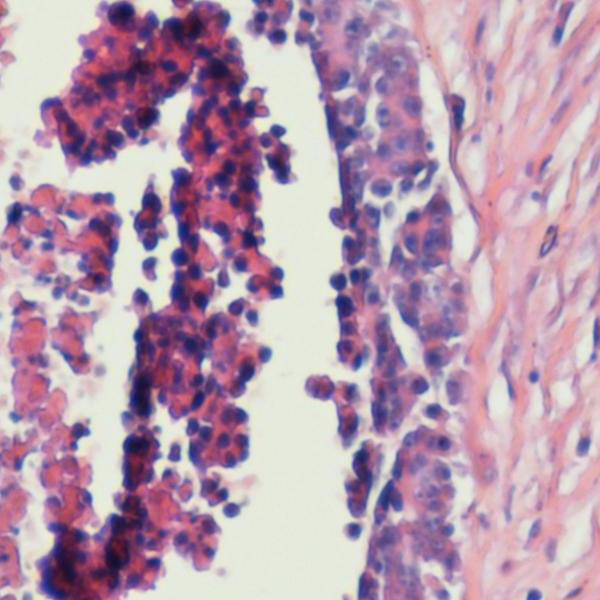

In [159]:
rgb_image = np.array(Image.open("sample.jpg"))
hsv_image = np.array(Image.open("sample.jpg").convert("HSV"))

def show(vec, hsv=False, file=False):
    pixels = vec.reshape((600,600,3))
    if(hsv):
        image = Image.fromarray(pixels.astype('uint8'), 'HSV').convert("RGB")
    else: 
        image = Image.fromarray(pixels.astype('uint8'), 'RGB')
        
    if(file):
        image.save(file+".png")
        
    display(image)
   
# Vectorized image
image = hsv_image.reshape((-1,3))

show(image, True)

***K***-means algorithm


Kmeans  2

The minimum value of the objective function is 1119390025.6149583
The centroids are [[217.34273862  78.98803534 174.31759554]
 [ 45.33359759  16.09456096 230.18550928]]
Number of iterations 2 



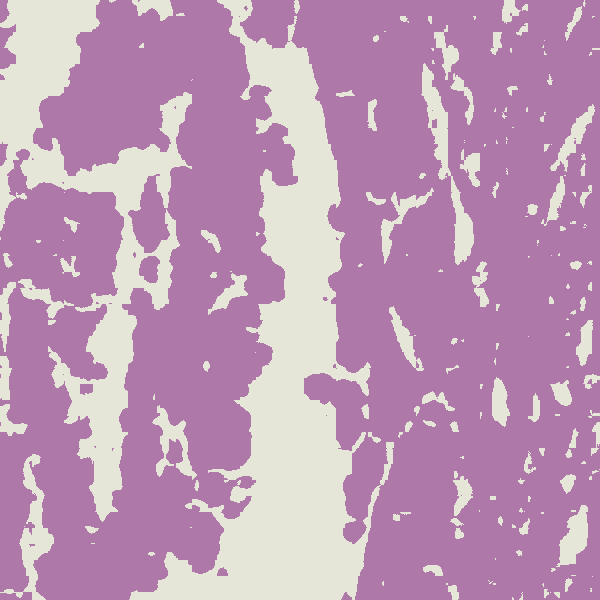


Kmeans  4

The minimum value of the objective function is 372214407.3124077
The centroids are [[229.3682828   41.4445378  210.31096331]
 [ 44.87296611  16.09919955 230.21723088]
 [203.16664921 137.96905111 115.48036238]
 [210.92672195  88.24092869 166.83609729]]
Number of iterations 9 



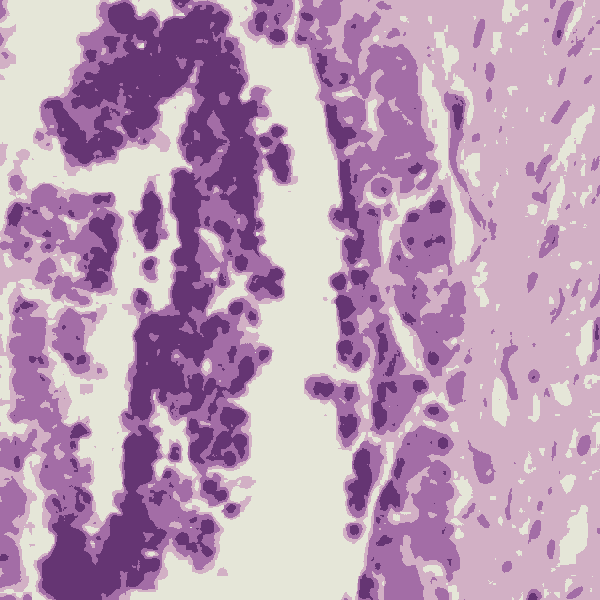


Kmeans  8

The minimum value of the objective function is 204180564.7122203
The centroids are [[ 54.11960539  14.91505719 232.04654382]
 [237.80506664  33.01731271 217.0368637 ]
 [200.37419089 141.43185197 107.29791176]
 [235.56967125 124.80105748 172.13193295]
 [197.41994692  87.29196593 151.88822077]
 [ 15.49284254  19.73893661 224.82449898]
 [192.0931782   37.11949748 190.20892999]
 [234.5626301   67.64561471 200.88246529]]
Number of iterations 15 



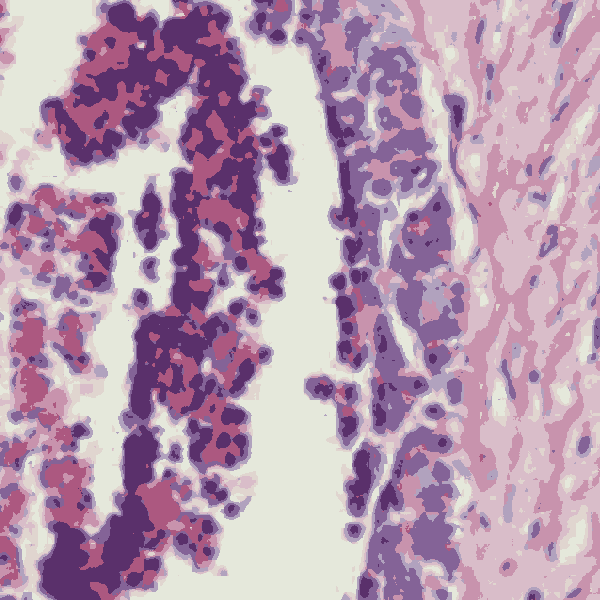


Kmeans  16

The minimum value of the objective function is 113460670.816497
The centroids are [[240.60333699  55.77913174 215.78119393]
 [ 53.58177914  14.95939066 232.10038219]
 [209.13021648 121.59083203 112.86671883]
 [220.31363895  55.44703872 180.63396925]
 [238.73187043 124.92880529 185.70916057]
 [209.71295737  28.14237411 199.41305398]
 [ 15.32244224  19.75858086 224.81563531]
 [232.04966381 140.60169621 141.55814487]
 [202.14454364 155.29926953  83.8628348 ]
 [239.42241058  26.58746886 219.00200452]
 [213.07187571  85.35110806 152.77820425]
 [234.72149857  85.63658355 195.67268329]
 [161.50116614  22.59761284 209.9311291 ]
 [178.98021309 144.08447489 122.57458143]
 [188.34288148  64.18757321 168.2565222 ]
 [184.53515805 102.65199408 145.41505387]]
Number of iterations 129 



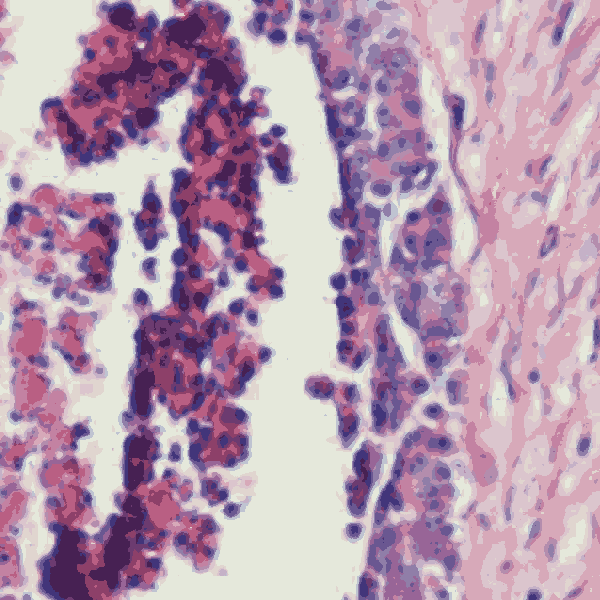

In [161]:
def kmeans(img, k, n, seed):
#   Generate starting points
    np.random.seed(seed)
    seeds = np.random.randint(0, 1000, size=n)
    
#   Sum of squared distances to closest cluster
    distances = []
    iterations = []
    centroids = []
    labels = []
    
#   Run algorithm N times
    for s in seeds:
        km = KMeans(n_clusters=k, random_state=s, n_jobs=-1)
        km.fit(img)

#       Store results
        iterations.append(km.n_iter_)
        distances.append(km.inertia_)
        centroids.append(km.cluster_centers_)
        labels.append(km.labels_)

#   Evaluate best results
    best_index = np.argmin(distances) 
    
    best = {
        "distance": distances[best_index],
        "centroids": centroids[best_index],
        "iterations": iterations[best_index],
        "labels": labels[best_index],
        "image": None
    }
    
#   Generating image
    best["image"] = best["centroids"][best["labels"]].astype('uint8')
    
    return best

clusters = [2,4,8,16]
kmeans_estimates = {}

np.random.seed(12345)
for k in clusters:
    estimate = kmeans(image, k, 1, np.random.randint(0, 1000))
    print("\nKmeans ",k)
    print("\nThe minimum value of the objective function is", estimate["distance"])
    print("The centroids are", estimate["centroids"])
    print("Number of iterations", estimate["iterations"], "\n")
    show(estimate["image"], hsv=True, file="output/kmeans - "+str(k))
    kmeans_estimates[k] = estimate

# display(kmeans_estimates)

Agglomerative hierarchical clustering algorithm

Spectral clustering algorithm 